### CS 4010: Homework 4 

### Due Friday, 10/4/2024

### Create a New iPython (Jupyter) notebook. Name the notebook FirstAndLastName_Homework3 and save it before you start working

### To submit, export or print your notebook as a pdf, with all outputs visible. Upload both the pdf and a copy of your notebook (.ipynb) in Canvas.

### Histograms, Speed and Accuracy.

1) 1-D Histograms

Download the file grades.txt from Canvas. 

The file contains grades from a class with 300 students. Each column are the grades from their exam. Column 0 is MT1, Col1 is MT2 etc... 

A) Create 4 histograms of the students' grades, 1 for each Midterm. 
Use the bins=linspace(0,100,nbins) functionality and adjust the nbins so the histogram isn't too "hairly" or too coarse.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

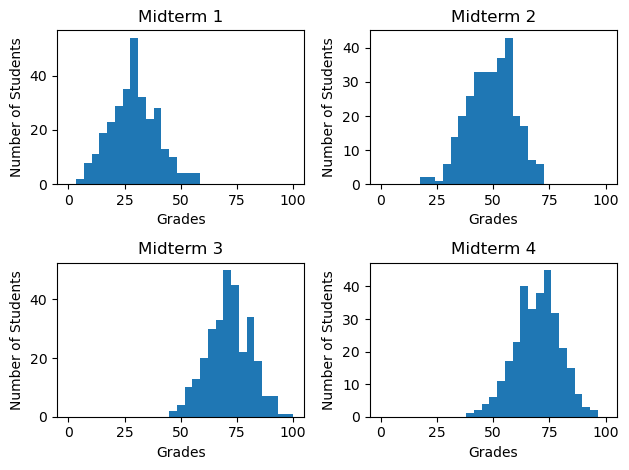

In [37]:
# 1a
grades = np.loadtxt("grades.txt")

nbins = 30
bins = np.linspace(0, 100, nbins)

fig, axs = plt.subplots(2, 2)

# Midterm 1 histogram
axs[0, 0].hist(grades[:, 0], bins=bins)
axs[0, 0].set_title('Midterm 1')
axs[0, 0].set_xlabel('Grades')
axs[0, 0].set_ylabel('Number of Students')

# Midterm 2 histogram
axs[0, 1].hist(grades[:, 1], bins=bins)
axs[0, 1].set_title('Midterm 2')
axs[0, 1].set_xlabel('Grades')
axs[0, 1].set_ylabel('Number of Students')

# Midterm 3 histogram
axs[1, 0].hist(grades[:, 2], bins=bins)
axs[1, 0].set_title('Midterm 3')
axs[1, 0].set_xlabel('Grades')
axs[1, 0].set_ylabel('Number of Students')

# Midterm 4 histogram
axs[1, 1].hist(grades[:, 3], bins=bins)
axs[1, 1].set_title('Midterm 4')
axs[1, 1].set_xlabel('Grades')
axs[1, 1].set_ylabel('Number of Students')

plt.tight_layout()
plt.show()

B) The hist function will returns 2 lists of values called a tuple, you can save this array by assigning the result to a variable like this for example
    
    h1 = hist(grades[ : , 1])
    
    print(type(h1))

h1[0] is the array of the histogram's y-values. h1[1] are the bin edges of the histogram. 
So the len(h1[1]) will be greater than len(h1[0]) by 1 all the time. This is silly so let's change that to bin center instead.

C) Write a function BinCenter that takes a list of bin edges and returns the bin centers instead. The return list should be 1 element shorter than the original.

In [26]:
# 1b, 1c
def BinCenter(bin_edges):
    return (bin_edges[:-1] + bin_edges[1:]) / 2

D) Use your BinCenter function to change all the h1[1] bin edge list to binCenter lists.

In [42]:
# 1d
bin_centers = BinCenter(h1[1])

print(f"Bin edges: {h1[1]}")
print(f"Bin centers: {bin_centers}")

Bin edges: [ 4.24   9.497 14.754 20.011 25.268 30.525 35.782 41.039 46.296 51.553
 56.81 ]
Bin centers: [ 6.8685 12.1255 17.3825 22.6395 27.8965 33.1535 38.4105 43.6675 48.9245
 54.1815]


E) Write a function WeightedAvg that computes the weighted average with a given list 
of vals and weights
    
$$Avg = \frac{\sum{ val*weight}}{\sum{weight}}$$

In [66]:
def WeightedAvg(vals, weights):
    total_weight = sum(weights)

    if (total_weight == 0):
        return np.nan

    weighted_sum = sum(val * weight for val, weight in zip(vals, weights))

    return weighted_sum / total_weight

F) Use your BinCenter and WeightedAvg to find the mean of each histogram and see 
if it matches the peaks you see in the histogram.

In [50]:
for i in range(4):
    frequencies, bin_edges = np.histogram(grades[:, i], bins=bins)

    bin_centers = BinCenter(bin_edges)

    mean = WeightedAvg(bin_centers, frequencies)

    print(f"Midterm {i + 1} - Calculated Mean: {mean:.2f}")

Midterm 1 - Calculated Mean: 29.25
Midterm 2 - Calculated Mean: 49.06
Midterm 3 - Calculated Mean: 71.45
Midterm 4 - Calculated Mean: 69.60


2) 2-D Histograms

A) Download and load "stars.txt" in your program. Make a 2D Histogram of Magnitude 
of the Stars vs Temperature of the Stars. Choose a 50x50 bins size.

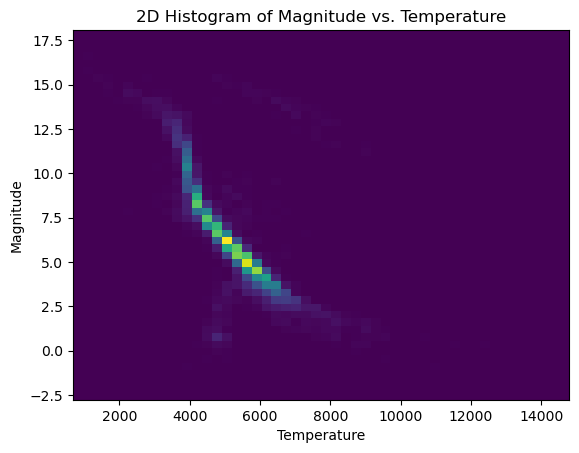

In [20]:
stars = np.loadtxt("stars.txt")

temp = stars[:, 0]
magnitude = stars[:, 1]

plt.hist2d(temp, magnitude, bins=[50, 50])
plt.title("2D Histogram of Magnitude vs. Temperature")
plt.xlabel("Temperature")
plt.ylabel("Magnitude")

plt.show()

B) Change the color scale to LogNorm instead and add the colorbar to the plot and 
increase the figure size to (12,8)
    
    from matplotlib.colors import LogNorm
    from pylab import colorbar, figure

In [22]:
from matplotlib.colors import LogNorm
from pylab import colorbar, figure

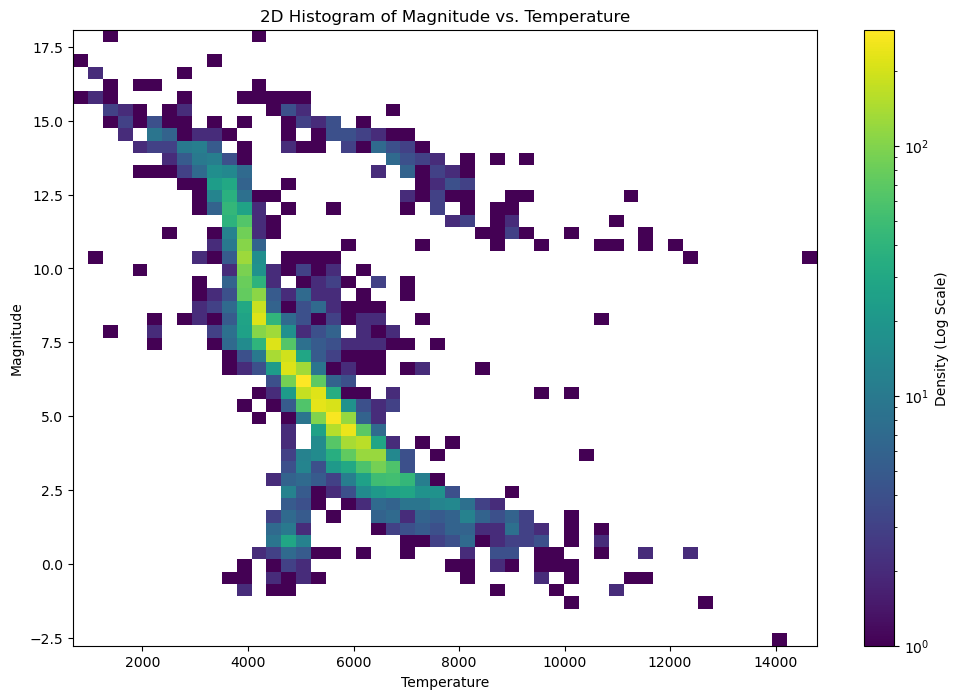

In [24]:
plt.figure(figsize=(12, 8))

plt.hist2d(temp, magnitude, bins=[50, 50], norm=LogNorm())
plt.colorbar(label="Density (Log Scale)")
plt.title("2D Histogram of Magnitude vs. Temperature")
plt.xlabel("Temperature")
plt.ylabel("Magnitude")
plt.show()

C) hist2D also returns  the histogram information to you in tuple form, but everything 
is in 2D now!

    h2 = hist2D(stars[:,0],stars[:,1])
    
    print(type(h2))

h2[0] is the NxM array of the values of the histogram.
    
h2[1] is the array of x bin edges
    
h2[2] is the array of y bin edges
    
The bin edges have 1 more elements than the number of bins as usual, but we can use BinCenter to fix that. 
Use BinCenter to save the arrays of the Temperature Bin Center and Magnitude Bin Center.

In [56]:
temp_bin_centers = BinCenter(h2[1])
magnitude_bin_centers = BinCenter(h2[2])

print(f"Temp bin centers: {temp_bin_centers}")
print(f"Magnitude bin centers: {magnitude_bin_centers}")

Temp bin centers: [  824.17435526  1106.23289495  1388.29143464  1670.34997434
  1952.40851403  2234.46705373  2516.52559342  2798.58413311
  3080.64267281  3362.7012125   3644.75975219  3926.81829189
  4208.87683158  4490.93537128  4772.99391097  5055.05245066
  5337.11099036  5619.16953005  5901.22806975  6183.28660944
  6465.34514913  6747.40368883  7029.46222852  7311.52076821
  7593.57930791  7875.6378476   8157.6963873   8439.75492699
  8721.81346668  9003.87200638  9285.93054607  9567.98908576
  9850.04762546 10132.10616515 10414.16470485 10696.22324454
 10978.28178423 11260.34032393 11542.39886362 11824.45740332
 12106.51594301 12388.5744827  12670.6330224  12952.69156209
 13234.75010178 13516.80864148 13798.86718117 14080.92572087
 14362.98426056 14645.04280025]
Magnitude bin centers: [-2.5615 -2.1445 -1.7275 -1.3105 -0.8935 -0.4765 -0.0595  0.3575  0.7745
  1.1915  1.6085  2.0255  2.4425  2.8595  3.2765  3.6935  4.1105  4.5275
  4.9445  5.3615  5.7785  6.1955  6.6125  7.0295 

D) h2[0] is a 2D array so that's harder to deal with. Write a program that loops over the y-axis (Magnitude) of h2[0] and compute the WeightedAvg for each row of x-values (Temperature). Save these values to an array.
Plot Magnitude vs WeightedAvg Temperature you computed and overlay it with the Histogram.

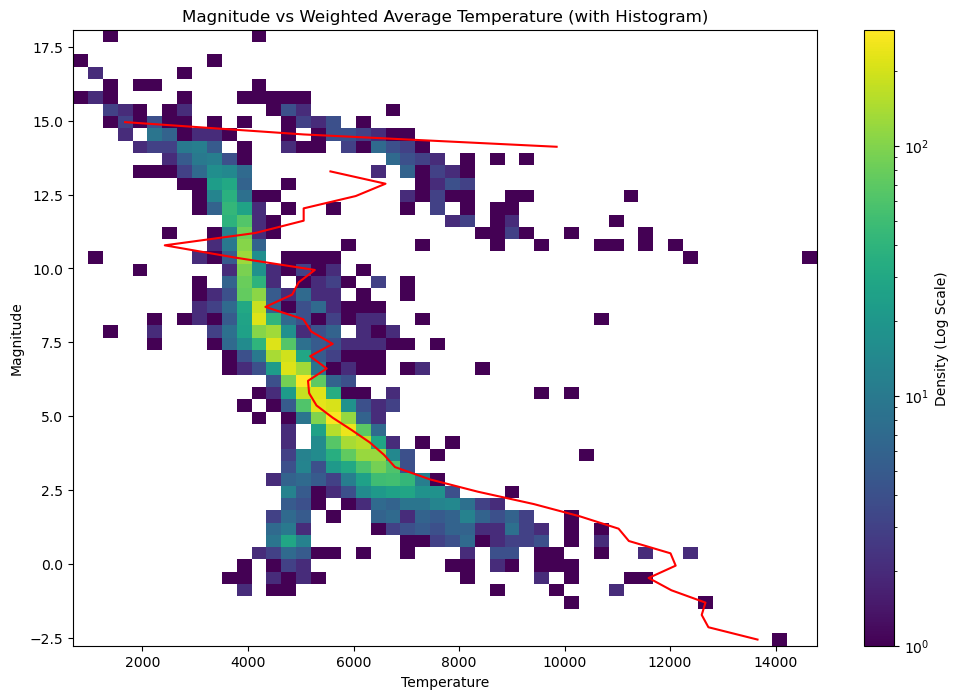

In [72]:
weighted_avg_temps = []
for i in range(len(h2[0])):
    row_counts = h2[0][i]
    weighted_avg = WeightedAvg(temp_bin_centers, row_counts)
    weighted_avg_temps.append(weighted_avg)

weighted_avg_temps = np.array(weighted_avg_temps)

plt.figure(figsize=(12, 8))
plt.hist2d(temp, magnitude, bins=[50, 50], norm=LogNorm())
plt.colorbar(label='Density (Log Scale)')

plt.plot(weighted_avg_temps, magnitude_bin_centers, color="red", label="Weighted Avg Temp")
plt.xlabel("Temperature")
plt.ylabel("Magnitude")
plt.title("Magnitude vs Weighted Average Temperature (with Histogram)")
plt.show()

E) Noticed that your WeightedAvg goes through the top of the Histogram most in 
the bulk but does NOT near the top or bottom. Explain why briefly. 

The reason why WeightedAvg goes through the top of the Histogram most in the bulk but does not near the top or bottom is because the weighted average aligns with the peak of the histogram. At the top and bottom, there are fewer data points, so the weighted average is skewed towards outliers. So, small variations have a larger impact on the average. 

3) Factorials revisited

For Homework 3, you had to make two different function to calculate factorials.  One used a for loop, and one used a recursive function that called itsself.  

A) Which of these function was faster for calculating large factorials?  (Say, 100!)  You'll needed to use 

    import timeit

or something similar to time the two functions.

B) What is the largest factorial your functions can calculate <b>as a floating point number</b>, before they return infinity?  You might need to modify your factorial function to return a float by setting the initial number (0!) to 1.0 instead of 1